# Python: Web scraping on IMDB website

**Goal**: extract and summarize data on recently released movies for 2022 year!

## Introduction to the website

In this challenge, we are going to scrape a well-known movie review site IMDB and the goal is to get the IMDB ratings (👍) and metascore ratings (👎) of several movies . So, we are going to analyze all the film reviews of the year 2022. For that, go on the site https://www.imdb.com/ and select on the advanced search option then filter the films on the year 2022. And finally, sort by number of votes (descending).

## Structure of the url

Thus, after answering the questions in the first section, the URL looks like this: https://www.imdb.com/search/title/?release_date=2022-01-01,2022-12-31&sort=num_votes,desc. This last one presents some **parameters**, namely **release_date** which filters on the desired year (here **2022**), then we have the **sort** parameter which sorts according to a variable in an order (here the variable **num_votes by descending order**). And if you change the page, the **page**, **start** and **ref_** parameters are added. This means that when you do web scraping, you have to look at the structure of the URL to be able to take all the parameters into account.

For this section, we try to answer the following questions:

* import the get() function from the requests module

* assign the url of the page to the url variable

* download the page and assign the result to the response variable

* display an extract of the result

In [1]:
from requests import get

In [2]:
url = "https://www.imdb.com/search/title/?release_date=2022-01-01,2022-12-31&sort=num_votes,desc"
response = get(url)

In [3]:
print(response.text[0:2000])



<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         

        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">




        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
        <title>Released between 2022-01-01 and 2022-12-31
(Sorted by Number of Votes Descending) - IMDb</title>
  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>

        

## HTML structure of the website

**Tips**: to understand the structure of a web page when web scraping, you should always try to inspect the page and look at what each element corresponds to (div, class, etc). This will allow not only to understand the structure of the page we want to scrape but also to locate each object. Among other things, this saves a lot of time.

For this section, we try to answer the following questions:

* import the BeautifulSoup class from the bs4 package

* extract the HTML code

* use the find_all() method to extract the desired elements (div class="lister-item mode-advanced")

In [4]:
from bs4 import BeautifulSoup 

In [5]:
html_code = BeautifulSoup(response.text, 'html.parser')

In [6]:
movies_containers = html_code.find_all('div', class_="lister-item mode-advanced")
print(len(movies_containers)) # we have 50 movies

50


## Extract data for a single movie

For this section, we try to answer the following questions:

* extract the image from the first movie

* extract the title of the first movie

* extract the name of the episode of the first movie

* extract the summary of the first movie

* extract the year of release of the first movie

* extract the IMDB rating (to be converted to a decimal number)

* extract the number of votes (use the attrs parameter)

**Note**: the first movie has no metascore for the moment. So we won't extract the metascore of the first movie.

In [7]:
first_movie = movies_containers[0]
print(first_movie)

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt17277218"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt17277218/"> <img alt="Two Brothers" class="loadlate" data-tconst="tt17277218" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMTNmYWJhOWItZjg3ZC00YWUxLWIzMGYtNWQ0YmQ0MzRkYTBhXkEyXkFqcGdeQXVyNjAwNDUxODI@._V1_UY98_CR53,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt2560140/"> L'attaque des titans</a> <span class="lister-item-year text-muted unbold">(2013–2022)</span>
<br/>
<small class="text-primary unbold">Episode:</small>
<a href="/title/tt17277218/">Two Brothers</a>
<span class="lister-item-year text-muted unbold">(2022)</span>
</h3>
<p class="text-mu

In [8]:
from IPython.display import Image

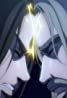

In [9]:
url_img_first_movie = first_movie.find('img', class_="loadlate")['loadlate']
Image(url_img_first_movie, width = 150)

In [10]:
title_first_movie = first_movie.h3.a.text
print(title_first_movie)

 L'attaque des titans


In [11]:
episodename_first_movie = first_movie.h3.find_all('a')[1].text
print(episodename_first_movie)

Two Brothers


In [12]:
summary_first_movie = first_movie.find_all('p', class_="text-muted")[1].text
print(summary_first_movie)


Colt pleads with Zeke to not use his scream and turn Falco into a Titan. All the while, soldiers and Titans clash in battle as Eren struggles to make contact with his brother.


In [13]:
year_first_movie = first_movie.h3.find('span', class_="lister-item-year text-muted unbold").text
print(year_first_movie)

(2013–2022)


In [14]:
rating_first_movie = float(first_movie.strong.text)
print(rating_first_movie)

9.7


In [15]:
numvotes_first_movie = int(first_movie.find('span', attrs = {'name':'nv'})['data-value'])
print(numvotes_first_movie)

53297


## Script to scrap a single page

In this section we will create a single script to scrape a single page. For information, we have seen in the previous section that there are movies that don't have a metascore or episodes name, etc., this is for example the case of the first movie for metascore. We all know that Python returns a None object if an element is not present. So, we will take this information into account in this script. Thus, we will extract all the information from the previous section with one more information (the metascore).

In [16]:
# we create empty lists for all our infos

titles_movies = []
episodename_movie = ''
episodenames_movies = []
years_movies = []
ratings_movies = []
numvotes_movies = []
metascore_movie = 0
metascores_movies = []

# we use our movies_containers data to extract the infos

for movie in movies_containers:
    
    # we get the infos
    
    title_movie = movie.h3.a.text
    year_movie = movie.h3.find('span', class_="lister-item-year text-muted unbold").text
    rating_movie = float(movie.strong.text)
    numvotes_movie = int(movie.find('span', attrs = {'name':'nv'})['data-value'])
    
    # we will use an exception for movies that do not have episode names
    
    try:
        episodename_movie = movie.h3.find_all('a')[1].text
    except Exception:
        episodename_movie = movie.h3.find_all('a')[0].text
    
    # if the movie has a metascore, we extract it
    
    if movie.find('div', class_="inline-block ratings-metascore") is not None:
        metascore_movie = int(movie.find('div', class_="inline-block ratings-metascore").find('span').text)
    
    # we add the items
    
    titles_movies.append(title_movie)
    episodenames_movies.append(episodename_movie)
    years_movies.append(year_movie)
    ratings_movies.append(rating_movie)
    numvotes_movies.append(numvotes_movie)
    metascores_movies.append(metascore_movie)

In [17]:
# we display all results with pandas
import pandas as pd

In [18]:
first_page_results = pd.DataFrame(
    {
        "titles_movies" : titles_movies, 
        "episodenames_movies" : episodenames_movies, 
        "years_movies" : years_movies, 
        "ratings_movies" : ratings_movies, 
        "numvotes_movies" : numvotes_movies,
        "metascores_movies" : metascores_movies
    }
)
first_page_results

,titles_movies,episodenames_movies,years_movies,ratings_movies,numvotes_movies,metascores_movies
0,L'attaque des titans,Two Brothers,(2013–2022),9.7,53297,0
1,L'attaque des titans,Memories of the Future,(2013–2022),9.9,42786,0
2,L'attaque des titans,"From You, 2000 Years Ago",(2013–2022),9.9,40020,0
3,Scream,Scream,(I) (2022),7.0,39486,60
4,Reacher,Reacher,(2022– ),8.5,36219,60
5,Peacemaker,Peacemaker,(2022– ),8.5,36071,60
6,Harry Potter : Retour à Poudlard,Harry Potter : Retour à Poudlard,(2022 TV Special),8.0,33176,60
7,L'attaque des titans,Judgment,(2013–2022),9.1,32007,60
8,Archive 81,Archive 81,(2022– ),7.4,30890,60
9,L'attaque des titans,Sneak Attack,(2013–2022),9.4,26388,60


## Script to scrap all pages

The goal of this section is to provide a code to scrape all pages. For the sake of runtime, we will limit ourselves to the first **2 pages** for the **years 2015 to 2022**. That is to say that we will necessarily play on the parameter of the URL that we have listed above, namely **release_date** and another parameter **start**.

In [19]:
starts = [str(i) for i in range(1,100, 50)]
starts

['1', '51']

In [20]:
years_url = [str(i) for i in range(2015,2023)]
years_url

['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

Before we start scraping multiple pages, let's take a look at how to **control the rate of requests sent**. Indeed, in web scraping, the risk is to send a very large number of requests per second and that our IP is banned. The other risk is to disrupt the usefulness of the server and therefore the website. So to control this rate of request sent, we use the **sleep()** function of the **time module** which will pause the execution of our loop for a certain time. The idea of controlling the request rate is to measure the frequency of requests to avoid problems of latency in the requests, when we scrape thousands of pages with a single script.

In [21]:
from time import time
from time import sleep
from warnings import warn
from random import randint
from IPython.display import clear_output

In [22]:
titles_movies = []
episodename_movie = ''
episodenames_movies = []
years_movies = []
ratings_movies = []
numvotes_movies = []
metascore_movie = 0
metascores_movies = []

start_time = time()
requests = 0

for year_url in years_url:
    
    for start in starts:
        
        response = get("https://www.imdb.com/search/title/?release_date="+year_url+"-01-01,"
                       +year_url+"-12-31&sort=num_votes,desc&start="+start)
        
        sleep(randint(8,15))
        
        requests += 1
        elapsed_time = time() - start_time
        
        print("Request: {} <---> Frequency: {} requests/s".format(requests, requests/elapsed_time))
        clear_output(wait=True)
        
        if response.status_code != 200:
            warn('Request: {} <---> Status code: {}'.format(requests, response.status_code))
            
        if requests > 10:
            warn('Too many requests!')
            break
            
        html_code = BeautifulSoup(response.text, 'html.parser')
        
        movies_containers = html_code.find_all('div', class_="lister-item mode-advanced")
        
        for movie in movies_containers:
            
            title_movie = movie.h3.a.text
            year_movie = movie.h3.find('span', class_="lister-item-year text-muted unbold").text
            rating_movie = float(movie.strong.text)
            numvotes_movie = int(movie.find('span', attrs = {'name':'nv'})['data-value'])

            try:
                episodename_movie = movie.h3.find_all('a')[1].text
            except Exception:
                episodename_movie = movie.h3.find_all('a')[0].text

            if movie.find('div', class_="inline-block ratings-metascore") is not None:
                metascore_movie = int(movie.find('div', class_="inline-block ratings-metascore").find('span').text)

            titles_movies.append(title_movie)
            episodenames_movies.append(episodename_movie)
            years_movies.append(year_movie)
            ratings_movies.append(rating_movie)
            numvotes_movies.append(numvotes_movie)
            metascores_movies.append(metascore_movie)

Request: 13 <---> Frequency: 0.08368173140051906 requests/s


In [23]:
first_two_page_results = pd.DataFrame(
    {
        "titles_movies" : titles_movies, 
        "episodenames_movies" : episodenames_movies, 
        "years_movies" : years_movies, 
        "ratings_movies" : ratings_movies, 
        "numvotes_movies" : numvotes_movies,
        "metascores_movies" : metascores_movies
    }
)
first_two_page_results

,titles_movies,episodenames_movies,years_movies,ratings_movies,numvotes_movies,metascores_movies
0,Mad Max: Fury Road,Mad Max: Fury Road,(2015),8.1,953399,90
1,Star Wars : Épisode VII - Le Réveil de la Force,Star Wars : Épisode VII - Le Réveil de la Force,(2015),7.8,900114,80
2,Avengers : L'Ère d'Ultron,Avengers : L'Ère d'Ultron,(2015),7.3,818124,66
3,Seul sur Mars,Seul sur Mars,(2015),8.0,816680,80
4,The Revenant,The Revenant,(2015),8.0,766082,76
...,...,...,...,...,...,...
495,Une famille sur le ring,Une famille sur le ring,(2019),7.1,77713,68
496,Demon Slayer,Demon Slayer,(2019– ),8.7,77048,68
497,Anna,Anna,(II) (2019),6.7,76538,40
498,Un ami extraordinaire,Un ami extraordinaire,(2019),7.3,74785,80
